# Описательная статистика

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from scipy import stats

import warnings
warnings.filterwarnings("ignore") 

Основные статистики для описания данных:

 - средняя = `np.mean(sample)`
 - медиана = `np.median(sample)`
 - мода = `pd.Series(sample).mode()[0]`
 - дисперсия = `np.var(sample)`
 - стандартное отклонение = `np.std(sample)`

In [4]:
data = pd.Series(np.concatenate([np.random.normal(5, 1, 200), np.random.normal(15, 1, 5)]))

data.head()

0    5.717561
1    5.474264
2    4.292679
3    2.256181
4    5.990487
dtype: float64

In [5]:
data.mean()

5.2508582754794135

In [6]:
data.median()

4.971769923923649

In [7]:
data.mode()[0]

2.256180955650276

In [8]:
data.var()

3.392346826355344

In [9]:
data.std()

1.841832464247317

In [1]:
data.describe()

NameError: name 'data' is not defined

In [13]:
df = pd.DataFrame({
    'x': data,
    'y': pd.Series(np.concatenate([np.random.normal(5, 1, 200), np.random.normal(15, 1, 5)]))
})

df.describe().T

,count,mean,std,min,25%,50%,75%,max
x,205.0,5.250858,1.841832,2.256181,4.382060,4.971770,5.847585,15.675304
y,205.0,5.334650,1.886864,1.890241,4.471877,5.123508,5.622629,16.549072


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       205 non-null    float64
 1   y       205 non-null    float64
dtypes: float64(2)
memory usage: 3.3 KB


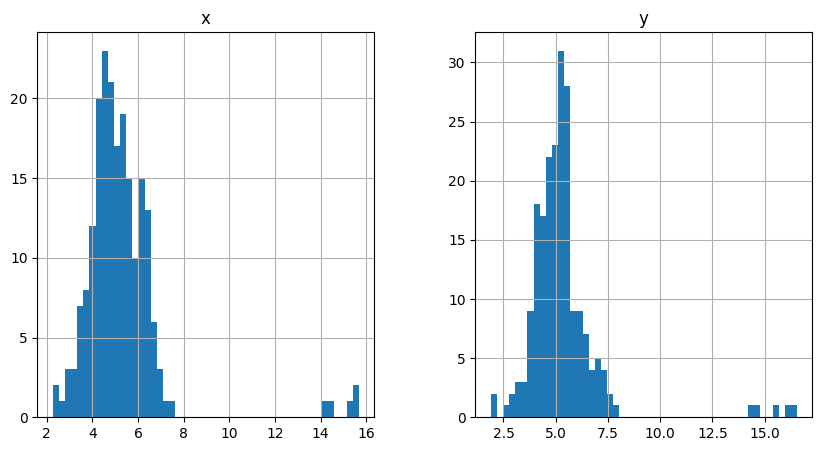

In [15]:
df.hist(bins=50, figsize=(10,5));

## Оценка выбросов

### Диаграмма размаха (aka Ящик с усами)

`Boxplot` позволяет быстро оценить основные параметры распределения, такие как *медиана, квартили, выбросы и дисперсия*. Диаграмма размаха состоит из прямоугольника, который представляет интерквартильный размах, линии, которые выходят из него и называются "усами" и точек за пределами границы усов, которые могут быть выбросами. Диаграмма размаха может использоваться для сравнения нескольких наборов данных и для идентификации выбросов в данных.

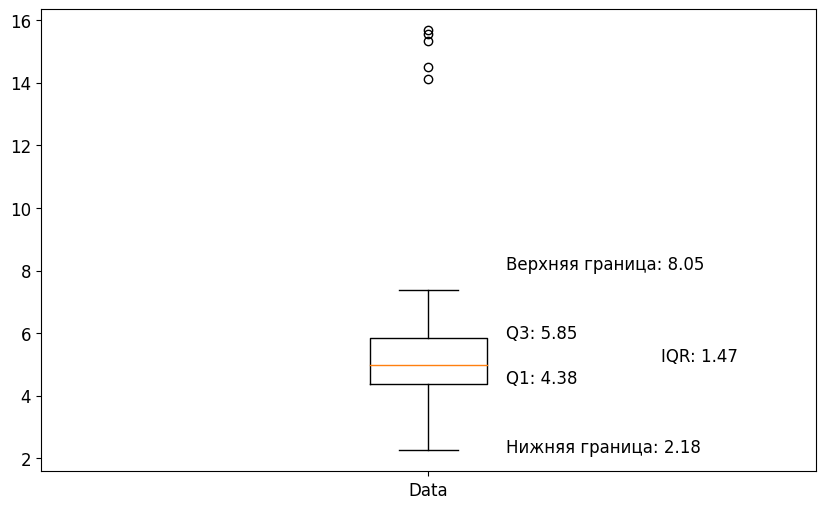

In [16]:
# вычисляем статистики для построения boxplot
q1, q3 = np.percentile(data, [25, 75])
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr
outliers = data[(data < lower_bound) | (data > upper_bound)]

# создаем диаграмму размаха
fig, ax = plt.subplots(figsize=(10, 6))
ax.boxplot(data)
ax.set_xticklabels(['Data'], fontsize=12)
ax.tick_params(labelsize=12)

# добавляем подписи
ax.annotate('Q1: {}'.format(round(q1, 2)), xy=(1, q1), xytext=(1.1, q1), fontsize=12)
ax.annotate('Q3: {}'.format(round(q3, 2)), xy=(1, q3), xytext=(1.1, q3), fontsize=12)
ax.annotate('IQR: {}'.format(round(iqr, 2)), xy=(1, (q1 + q3)/2), xytext=(1.3, (q1 + q3)/2), fontsize=12)
ax.annotate('Нижняя граница: {}'.format(round(lower_bound, 2)), xy=(1, lower_bound), xytext=(1.1, lower_bound), fontsize=12)
ax.annotate('Верхняя граница: {}'.format(round(upper_bound, 2)), xy=(1, upper_bound), xytext=(1.1, upper_bound), fontsize=12)

plt.show()

# Проверка гипотез с помощью python.

## **Проверка гипотез**

- Двусторонняя гипотеза
- Односторонняя гипотеза

### Двусторонняя гипотеза:
- **H0 — Нулевая гипотеза.**

*«Среднее время выполнения задачи на компьютере A не отличается от среднего времени выполнения на компьютере B».*

- **H1 — Альтернативная гипотеза.**

*«Среднее время выполнения задачи на компьютере A отличается от среднего времени выполнения на компьютере B».*

**Время выполнения задачи на компьютере А может быть как меньше, так и больше, чем на компьютере В**

### Односторонняя гипотеза

- **H0 — Нулевая гипотеза.**

*«Среднее время выполнения задачи на компьютере A равно среднему времени выполнения на компьютере B».*

- **H1 — Альтернативная гипотеза.**

*«Среднее время выполнения задачи на компьютере A меньше от среднего времени выполнения на компьютере B».*

**Время выполнение задачи на компьютере может сместиться лишь в одну сторону.**

После того, как гипотезы были сформулированы, можно приступить к проверке этих гипотез.

## P-value

**P-value** - то вероятность получения таких же или более экстремальных результатов в эксперименте, при условии, что нулевая гипотеза (гипотеза о равенстве эффекта в обеих группах) верна. Иными словами, это вероятность получить наблюдаемый результат только случайно. Чем меньше `p-value`, тем больше оснований отклонить нулевую гипотезу и принять альтернативную, что различия между группами статистически значимы. Обычно, если `p-value` меньше `0,05` (или `5%`), то различия считаются статистически значимыми.

## Рассмотрим пример

Метод `scipy.stats.ttest_1samp()` возвращает два числа: статистику разности и p-value.

Метод спользуется для определения статистической значимости различий между средним значением выборки и известным или гипотетическим значением среднего в генеральной совокупности. Он выполняет тест t-критерия Стьюдента и возвращает t-статистику и двустороннее p-значение.

### Двусторонний тест

In [17]:
rvs = stats.uniform.rvs(size=200, random_state=42)
stats.ttest_1samp(rvs, popmean=0.45)

Ttest_1sampResult(statistic=1.6308400722038674, pvalue=0.10450570418656004)

In [18]:
alpha = .05

_, pvalue = stats.ttest_1samp(rvs, popmean=0.5)

if pvalue < alpha:
    print(f'P-value:{pvalue:.5f}. Нулевая гипотеза отвергается')
else:
    print(f'P-value:{pvalue:.5f}. Подтверждается нулевая гипотеза')

P-value:0.44398. Подтверждается нулевая гипотеза


Это означает, что нет различий между средним значением выборки и `0.5`. Потому подтверждается нулевая гипотеза.

### Односторонний тест

А что, если нужно узнать, в какую именно сторону меняется?

In [21]:
alpha = .05
needed_value = 0.6

_, pvalue = stats.ttest_1samp(rvs, popmean=needed_value)

pvalue /= 2

if (pvalue < alpha) and (rvs.mean() < needed_value):
    print(f'P-value:{pvalue:.5f}. Нулевая гипотеза отвергается')
else:
    print(f'P-value:{pvalue:.5f}. Подтверждается нулевая гипотеза')

P-value:0.00000. Нулевая гипотеза отвергается


Алгоритм прост - нужно `pvalue` поделить на 2 и сравнить среднее с нужным значением!

## Равенство средних двух совокупностей

Метод `scipy.stats.ttest_ind()` используется для определения статистической значимости различий между средними значениями двух независимых выборок. Она выполняет двухсторонний тест t-критерия Стьюдента и возвращает t-статистику и двустороннее p-значение.

Аргументы функции:
 - первая выборки значений
 - вторая выборка значений
 - `equal_var` - опциональный параметр для указания равенства дисперсий между двумя выборками. По умолчанию, `equal_var=True`.

Перед тем, как проводить тест, нужно придерживаться трех правил:

1. **Независимость выборок** - данные в двух группах должны быть независимыми друг от друга. Если рассматриваются две выборки после определенного времени - лучше использовать другой тест.
2. **Дисперсии данных в каждой группе должны быть примерно равными.** В принципе, если значений больше 30 и выборки по размеру равны - можно пробовать.
3. **Распределение данных в каждой группе должно быть нормальным.** Но это условие тоже не препятствие - как говорилось в прошлом правиле, если значений много - они будут распределены вокруг истинного среднего (среднего ген. совокупности)

`equal_var`? Указывайте **False** только в том случае, если размеры выборок не равны и вы сомневаетесь, что диспресии равные.

In [26]:
a = np.random.normal(loc=50, scale=20, size=200)
b = np.random.normal(loc=100, scale=20, size=200)

alpha = .05

t_stat, pvalue = stats.ttest_ind(a, b)

if pvalue < alpha:
    print(f'P-value:{pvalue:.5f}. Нулевая гипотеза отвергается')
else:
    print(f'P-value:{pvalue:.5f}. Подтверждается нулевая гипотеза')

P-value:0.00000. Нулевая гипотеза отвергается


## Гипотеза о равенстве средних двух зависимых совокупностей

Метод `scipy.stats.ttest_rel()` - используется для проведения парного двухвыборочного t-теста на основе связанных выборок. Она вычисляет t-статистику и p-value для проверки гипотезы о равенстве средних значений двух связанных выборок. Эта команда принимает на вход два одномерных массива данных, представляющих собой две связанные выборки, и возвращает кортеж, состоящий из t-статистики и соответствующего ей p-value.

Таким методом обычно проверяют выборки после какого-либо времени или изменения.

In [29]:
a = np.random.normal(loc=100, scale=20, size=200)
b = np.random.normal(loc=50, scale=20, size=200)

alpha = .05

t_stat, pvalue = stats.ttest_rel(a, b)

if pvalue < alpha:
    print(f'P-value:{pvalue:.5f}. Нулевая гипотеза отвергается')
else:
    print(f'P-value:{pvalue:.5f}. Подтверждается нулевая гипотеза')

P-value:0.00000. Нулевая гипотеза отвергается


## Одномерный анализ

# Статистический анализ на норму


Анализы на норму используются для определения того, нормально ли распределен набор данных, и для проверки того, насколько вероятно, что случайная величина в наборе данных будет нормально распределена.

Популярные методы -  K'2-тест Д'Агостино, критерий Шапиро-Уилка, критерий Андерсона — Дарлинга.

Гипотезы:

* H0: выборка имеет распределение по Гауссу.
* H1: выборка не имеет распределения по Гауссу.

Примечание: **Тест Шапиро-Уилка** не выполняется в том случае, если размер выборки > 5000 и для этого теста p-значение может быть неточным для N > 5000

### Тест Шапиро-Уилка

In [32]:
_, pvalue = stats.shapiro(data)

alpha = .05

if pvalue < alpha:
    print(f'P-value:{pvalue:.5f}. Нулевая гипотеза отвергается')
else:
    print(f'P-value:{pvalue:.5f}. Подтверждается нулевая гипотеза')

P-value:0.00000. Нулевая гипотеза отвергается


<Axes: >

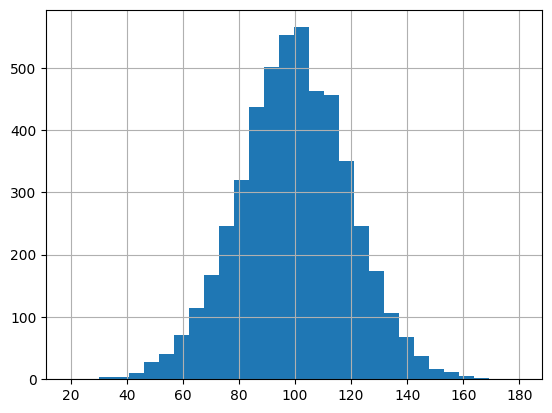

In [38]:
a = pd.Series(np.random.normal(loc=100, scale=20, size=5000))
a.hist(bins=30)

In [39]:
_, pvalue = stats.shapiro(a)

alpha = .05

if pvalue < alpha:
    print(f'P-value:{pvalue:.5f}. Нулевая гипотеза отвергается')
else:
    print(f'P-value:{pvalue:.5f}. Подтверждается нулевая гипотеза')

P-value:0.35073. Подтверждается нулевая гипотеза


### К'2-тест Д'Агостино

In [41]:
_, pvalue = stats.normaltest(a)

alpha = 0.05

if pvalue < alpha:
    print(f'P-value:{pvalue:.5f}. Нулевая гипотеза отвергается')
else:
    print(f'P-value:{pvalue:.5f}. Подтверждается нулевая гипотеза')

P-value:0.07687. Подтверждается нулевая гипотеза


### Критерий Андерсона — Дарлинга

`Критические значения` в статистическом тесте представляют собой диапазон заранее определенных границ значимости, при которых H0 может быть отклонен, если вычисленная статистика меньше критического значения.

Особенностью теста Андерсона-Дарлинга является то, что он возвращает список критических значений, а не одно значение p. Это может послужить основой для более тщательной интерпретации результата.

В данном случае - **normal/exponential** (15%, 10%, 5%, 2.5%, 1%)

In [43]:
result = stats.anderson(a)

print('Statistic: %.3f' % result.statistic)

p = 0

for i in range(len(result.critical_values)):
    sl, cv = result.significance_level[i], result.critical_values[i]
    if result.statistic < result.critical_values[i]:
        print(f'Уровень значимости {sl:.2f} % : критическое значение {cv:.3f}, данные выглядят нормально (не удается отклонить H0)')
    else:
        print(f'Уровень значимости {sl:.2f} % : критическое значение {cv:.3f}, данные не выглядят нормально (отклоняем H0)')

Statistic: 0.549
Уровень значимости 15.00 % : критическое значение 0.576, данные выглядят нормально (не удается отклонить H0)
Уровень значимости 10.00 % : критическое значение 0.655, данные выглядят нормально (не удается отклонить H0)
Уровень значимости 5.00 % : критическое значение 0.786, данные выглядят нормально (не удается отклонить H0)
Уровень значимости 2.50 % : критическое значение 0.917, данные выглядят нормально (не удается отклонить H0)
Уровень значимости 1.00 % : критическое значение 1.091, данные выглядят нормально (не удается отклонить H0)


## 6 Двумерный Анализ

В этом разделе мы проведем обширный статистический анализ с проверкой различных гипотез на основе парных типов данных: 

* числовые и числовые данные
* числовые и порядковые данные
* порядковые и порядковые данные
* категориальные и категориальные данные


**Основные гипотезы:**

* H0: эти два признака независимы
* H1: существует зависимость между признака

## Числовые и числовые

### Коэффициент ранговой корреляции Спирмена 

Она же `Spearman's rho` или `Spearman correlation coefficient`

Применяется к **Непрерывным или порядковым** переменным

Для корреляции `Пирсона` обе переменные должны быть нормально распределены

**В отличие от корреляции Пирсона**, корреляция Спирмена не предполагает, что оба набора данных **распределены нормально**

Корреляция Пирсона предполагает нормальность и линейность. Корреляция Пирсона также не может определить разницу между зависимыми и независимыми переменными

Гипотезы:

* **H0: две выборки не имеют монотонной взаимосвязи**
* **H1: существует монотонная взаимосвязь между выборками**

In [45]:
alpha = 0.05

correlation, pvalue = stats.spearmanr(df.x, df.y)

print(f'"x", "y" correlation: {correlation}, p: {pvalue}')

if pvalue > alpha:
    print('Вероятно, у них нет монотонной взаимосвязи (не удается отклонить H0)')
else:
    print('Вероятно, имеют монотонную взаимосвязь (отклоняем H0)')

"x", "y" correlation: 0.025437728963240515, p: 0.7173188635623288
Вероятно, у них нет монотонной взаимосвязи (не удается отклонить H0)


In [47]:
j = df.x * 1.1

alpha = 0.05

correlation, pvalue = stats.spearmanr(df.x, j)

print(f'"x", "y" correlation: {correlation}, p: {pvalue}')

if pvalue > alpha:
    print('Вероятно, у них нет монотонной взаимосвязи (не удается отклонить H0)')
else:
    print('Вероятно, имеют монотонную взаимосвязь (отклоняем H0)')

"x", "y" correlation: 0.9999999999999999, p: 0.0
Вероятно, имеют монотонную взаимосвязь (отклоняем H0)


## Числовые и порядковые

### Коэффициент корреляции Кендалла

Он же **Kendall's τ** или **Kendall's Tau** или T-тест

Тау Кендалла часто используется для корреляции непрерывных данных, если в данных есть выбросы

Τ-тест - это непараметрическая проверка гипотезы на статистическую зависимость, основанная на коэффициенте τ

Примеры порядковых переменных:
* возраст, вес, рост, результаты тестов, опросов, годовая зарплата и т.д
* уровень образования (бакалавры / магистры / профессора), уровень дохода (если сгруппирован в высокий / средний / низкий) и т.д

In [52]:
primer = [0, 1, 2]

df['z'] = np.random.choice(primer, size=len(df))

coef, pvalue = stats.kendalltau(df.x, df.z)
print(f"Корреляция между 'x' and 'z'")
print('Kendall correlation coefficient = %.5f, p = %.5f' % (coef, pvalue))

# interpret the significance
alpha = 0.05
if pvalue > alpha:
    print('Признаки некоррелированы (не удается отклонить H0) p=%.3f' % pvalue)
else:
    print('Признаки коррелированы (отклоняем H0) p=%.3f' % pvalue)

Корреляция между 'x' and 'z'
Kendall correlation coefficient = 0.11116, p = 0.03987
Признаки коррелированы (отклоняем H0) p=0.040


In [53]:
df['z'] = df.x.apply(lambda x: 0 if x < 5 else 1)

coef, pvalue = stats.kendalltau(df.x, df.z)
print(f"Корреляция между 'x' and 'z'")
print('Kendall correlation coefficient = %.5f, p = %.5f' % (coef, pvalue))

# interpret the significance
alpha = 0.05
if pvalue > alpha:
    print('Признаки некоррелированы (не удается отклонить H0) p=%.3f' % pvalue)
else:
    print('Признаки коррелированы (отклоняем H0) p=%.3f' % pvalue)

Корреляция между 'x' and 'z'
Kendall correlation coefficient = 0.70883, p = 0.00000
Признаки коррелированы (отклоняем H0) p=0.000


### U-критерий Манна — Уитни

U-критерий Манна-Уитни - это **непараметрический** тест статистической значимости для определения того, были ли взяты две независимые выборки из совокупности с одинаковым распределением.

Тест определяет, различаются ли медианы двух или более групп.

**ПРИМЕЧАНИЕ**: Для того, чтобы тест был эффективным, требуется **не менее 20 наблюдений** в каждой выборке данных.

* Не удается отклонить H0: Выборочные распределения равны. (или выборочные распределения, скорее всего, взяты из одной и той же совокупности)
* Отклоняем H0: Распределения выборок не равны.

In [57]:
stat, pvalue = stats.mannwhitneyu(df.x, df.z)
print(f"Корреляция между 'x' and 'z'")
print('Statistics = %.5f, p = %.5f' % (stat, pvalue))

alpha = 0.05
if pvalue > alpha:
    print('Одинаковое распределение (не удается отклонить H0)')
else:
    print('Различное распределение (отклонение H0)')

Корреляция между 'x' and 'z'
Statistics = 42025.00000, p = 0.00000
Различное распределение (отклонение H0)


## Категориальная & категориальная 

### Chi-квадрат

Обнаружим независимость между 2 категориальными переменными

Тестовая статистика в контексте распределения Chi-квадрат с необходимым числом степеней свободы

* Если Статистика >= Критическое значение: значимый результат, отклонить нулевую гипотезу (H0), зависимый.
* Если статистика < Критическое значение: результат незначим, не удается отклонить нулевую гипотезу (H0), независим.

В терминах p-значения и выбранного уровня значимости (альфа):

* Если p-значение <= альфа: значимый результат, отклоните нулевую гипотезу (H0), зависимую.
* Если p-значение > альфа: незначимый результат, не удается отклонить нулевую гипотезу (H0), независимую

In [62]:
df['w'] = np.random.choice(primer, size=len(df))

crosstab = pd.crosstab(df.z, df.w)

stat, p, dof, expected = stats.chi2_contingency(crosstab,correction=True)

print(f'p-value : {p}, degree of freedom: {dof}')

prob = 0.95
critical = stats.chi2.ppf(prob, dof)
print('probability=%.3f, critical=%.3f, stat=%.3f' % (prob, critical, stat))

if abs(stat) >= critical:
    print('Зависимый (отклонить H0)')
else:
    print('Независимый (не удается отклонить H0)')

alpha = 1.0 - prob

print('significance=%.3f, p=%.3f' % (alpha, p))
if p <= alpha:
    print('Зависимый (отклонить H0)')
else:
    print('Независимый (не удается отклонить H0)')

p-value : 0.5544278739191444, degree of freedom: 2
probability=0.950, critical=5.991, stat=1.180
Независимый (не удается отклонить H0)
significance=0.050, p=0.554
Независимый (не удается отклонить H0)


In [63]:
df['j'] = df.w.apply(lambda x: 1 if x == 0 else 0)

crosstab = pd.crosstab(df.w, df.j)

stat, p, dof, expected = stats.chi2_contingency(crosstab,correction=True)

print(f'p-value : {p}, degree of freedom: {dof}')

prob = 0.95
critical = stats.chi2.ppf(prob, dof)
print('probability=%.3f, critical=%.3f, stat=%.3f' % (prob, critical, stat))

if abs(stat) >= critical:
    print('Зависимый (отклонить H0)')
else:
    print('Независимый (не удается отклонить H0)')

alpha = 1.0 - prob

print('significance=%.3f, p=%.3f' % (alpha, p))
if p <= alpha:
    print('Зависимый (отклонить H0)')
else:
    print('Независимый (не удается отклонить H0)')

p-value : 3.053624313724677e-45, degree of freedom: 2
probability=0.950, critical=5.991, stat=205.000
Зависимый (отклонить H0)
significance=0.050, p=0.000
Зависимый (отклонить H0)


# Многомерный анализ

## Мультиколлинеарность

**Мультиколлинеарность** - это явление, когда два или более факторов в модели линейной регрессии сильно коррелируют между собой. Это может привести к значительному снижению точности и надежности результатов модели машинного обучения и может помешать определению вклада каждой переменной в модель. 

Встроенные в `pandas` методы:

 - `pearson` : Пирсона - стандартная.
 - `kendall` : Кендалл Тау
 - `spearman` : Ранговая Спирмена

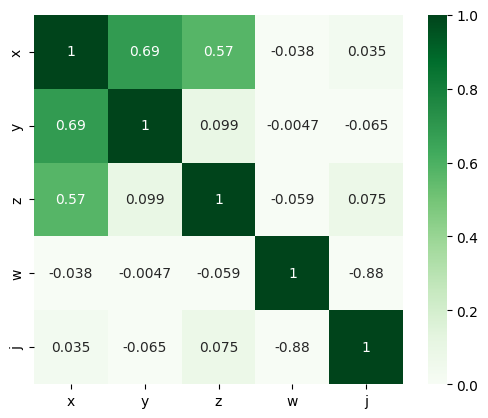

In [64]:
import seaborn as sns

corrs = df.dropna().corr()
sns.heatmap(corrs,
            cmap='Greens',
            square=True,
            vmin=0, 
            annot=True);

На практике обычно удаляются те, которые превышают значения `> 0.8`. **НО** не корреляции с таргетом. Если у признака есть корреляция с таргетом - значит этот признак будет увеличивать метрики модели.

### Phik - корреляция

`Phik` корреляция - это новый тип коэффициента корреляции, который основан на статистической информации о распределении переменных и измеряет не только линейную, но и нелинейную связь между переменными. Этот коэффициент был представлен в 2018 году в статье "Phik: a new correlation coefficient between nominal variables" и может быть очень полезен в анализе данных с категориальными переменными.

`Phik` корреляция является непараметрическим коэффициентом корреляции, что значит, что он не требует предположений о распределении данных. Он включает в себя информацию о распределении категориальных переменных и позволяет обнаруживать различные зависимости между переменными, которые могут быть упущены при использовании обычного коэффициента корреляции.

Суть метода базируется на подсчете хи-квадрат статистики, затем ее трансформации в нечто подобное коэффициенту корреляции только на отрезке от 0 (нулевая взаимосвязь) до 1 (максимальная взаимосвязь)

In [65]:
!pip install phik -q

In [66]:
import phik
from phik.report import plot_correlation_matrix
from phik import report

interval columns not set, guessing: ['x', 'y', 'z', 'w', 'j']


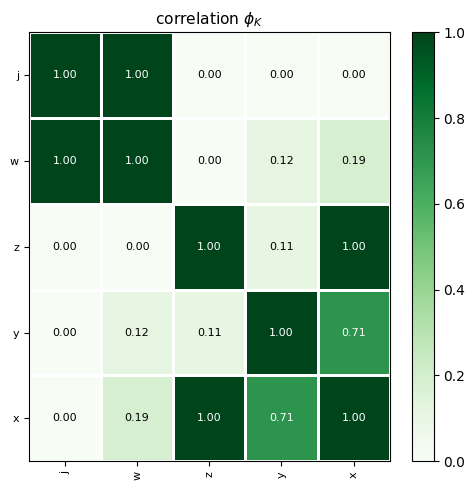

In [67]:
phik_overview = df.phik_matrix()

plot_correlation_matrix(phik_overview.values, 
                        x_labels=phik_overview.columns, 
                        y_labels=phik_overview.index, 
                        vmin=0, vmax=1, color_map="Greens", 
                        title=r"correlation $\phi_K$", 
                        fontsize_factor=0.8, figsize=(5, 5))
plt.tight_layout()